In [1]:
from openai import OpenAI
import os
import base64

#  读取本地文件，并编码为 Base64 格式
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")
    
# 将xxxx/eagle.png替换为你本地图像的绝对路径
base64_image = encode_image("E:\\AI学习\\Week10\\Week10_xx\\屏幕截图 2025-11-06 001812.png")

client = OpenAI(
    # 若没有配置环境变量，请用百炼API Key将下行替换为：api_key="sk-xxx" 
    # 新加坡和北京地域的API Key不同。获取API Key：https://help.aliyun.com/zh/model-studio/get-api-key
    api_key="sk-9c2bf41082244581bcead3b7a15ca737",
    # 以下是北京地域base-url，如果使用新加坡地域的模型，需要将base_url替换为：https://dashscope-intl.aliyuncs.com/compatible-mode/v1
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
)
completion = client.chat.completions.create(
    model="qwen-vl-ocr-latest",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image_url",
                    # 需要注意，传入Base64，图像格式（即image/{format}）需要与支持的图片列表中的Content Type保持一致。"f"是字符串格式化的方法。
                    # PNG图像：  f"data:image/png;base64,{base64_image}"
                    # JPEG图像： f"data:image/jpeg;base64,{base64_image}"
                    # WEBP图像： f"data:image/webp;base64,{base64_image}"
                    "image_url": {"url": f"data:image/png;base64,{base64_image}"},
                    # 输入图像的最小像素阈值，小于该值图像会按原比例放大，直到总像素大于min_pixels
                    "min_pixels": 28 * 28 * 4,
                    # 输入图像的最大像素阈值，超过该值图像会按原比例缩小，直到总像素低于max_pixels
                    "max_pixels": 28 * 28 * 8192
                },
                 # qwen-vl-ocr-latest支持在以下text字段中传入Prompt，若未传入，则会使用默认的Prompt：Please output only the text content from the image without any additional descriptions or formatting.
                 # 如调用qwen-vl-ocr-1028，模型会使用固定Prompt：Read all the text in the image.，不支持用户在text中传入自定义Prompt
                {"type": "text", "text": "解析图像中的文本。"},

            ],
        }
    ],
)
print(completion.choices[0].message.content)

1【第十周作业】

作业1：使用云端qwen-vl模型，完成图的分类，输入dog，识别dog or cat?

https://bailian.console.aliyun.com/?tab=model#/efm/

model_experience_center/vision

作业2：使用云端qwen-vl模型，完成带文字截图的图，文本的解析转换为文本。

作业3：加载中文的clip模型，只要cpu推理，跑完01-CLIP模型.ipynb

https://www.modelscope.cn/models/AI-ModelScope/chinese-clip-vit-

base-patch16

可以不用原始数据，任意10个图 10个文本，完成图文匹配。

(加油完成作业，作业在周五之前提交，遇到问题随时联系我们)


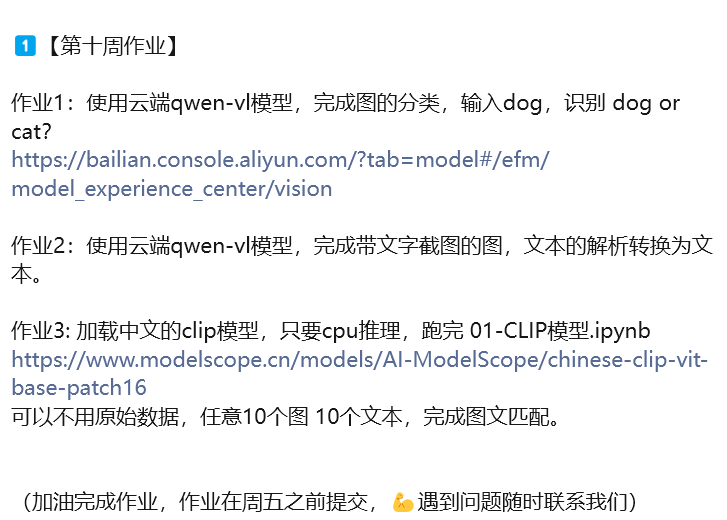

In [2]:
from PIL import Image
Image.open("E:\\AI学习\\Week10\\Week10_xx\\屏幕截图 2025-11-06 001812.png")